<a href="https://colab.research.google.com/github/Yasamin-Khorshidi/Linear_Control_4031/blob/main/Assignment/A1_2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# آ
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
print(iris.keys())

# *** #

from sklearn.model_selection import train_test_split

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# test_size=0.2 به این معنی است که 20% از داده‌ها برای آزمون استفاده می‌شوند.
# random_state برای تولید نتایج تکرارپذیر تنظیم می‌شود.
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

# *** #

df_train = pd.DataFrame(X_train, columns=iris.feature_names)
df_train['target'] = y_train
df_train['dataset'] = 'train'
print("df_train head:")
print(df_train.head())

df_test = pd.DataFrame(X_test, columns=iris.feature_names)
df_test['target'] = y_test
df_test['dataset'] = 'test'
print("\ndf_test head:")
print(df_test.head())

df_combined = pd.concat([df_train, df_test], ignore_index=True)
print("\ndf_combined head:")
print(df_combined.head())
print("\ndf_combined tail:")
print(df_combined.tail())


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
X_train shape: (120, 4)
X_test shape: (30, 4)
df_train head:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                4.6               3.6                1.0               0.2   
1                5.7               4.4                1.5               0.4   
2                6.7               3.1                4.4               1.4   
3                4.8               3.4                1.6               0.2   
4                4.4               3.2                1.3               0.2   

   target dataset  
0       0   train  
1       0   train  
2       1   train  
3       0   train  
4       0   train  

df_test head:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                6.1               2.8                4.7               1.2   
1                5.7               3.8                1.7      

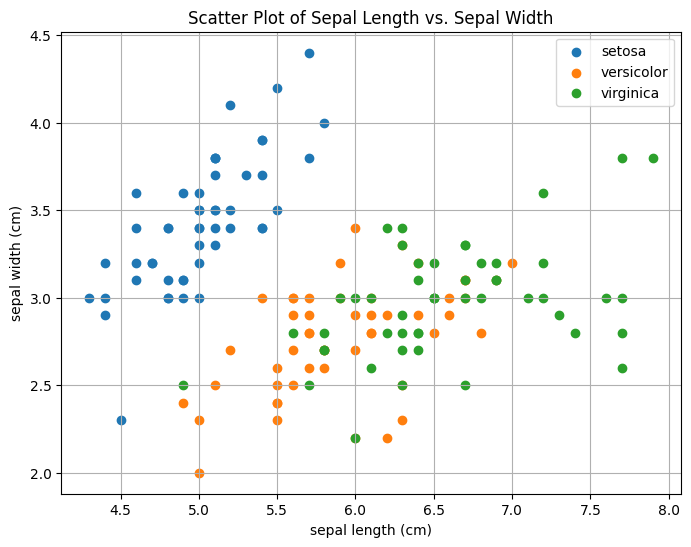

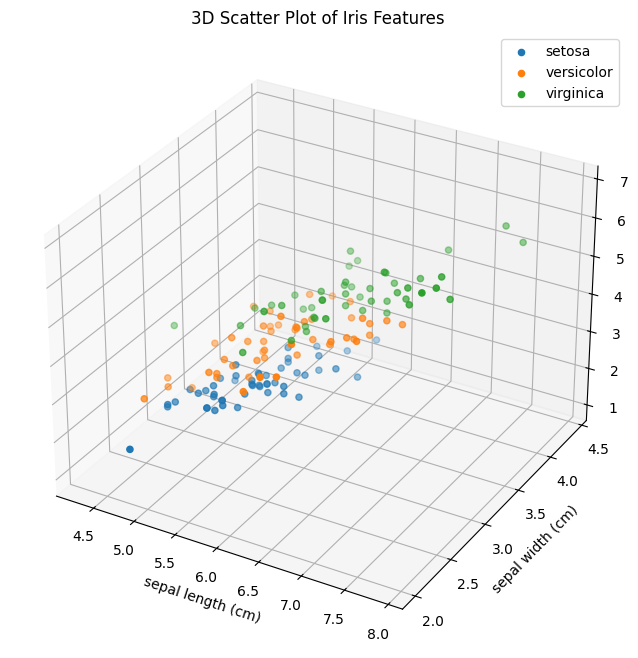

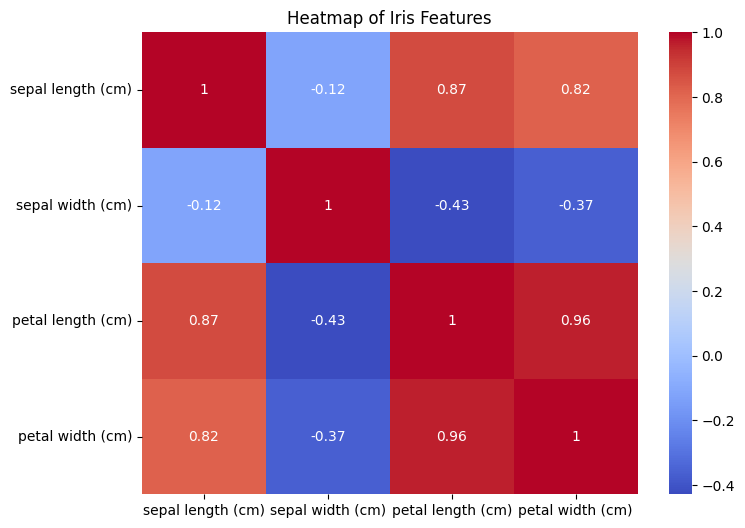

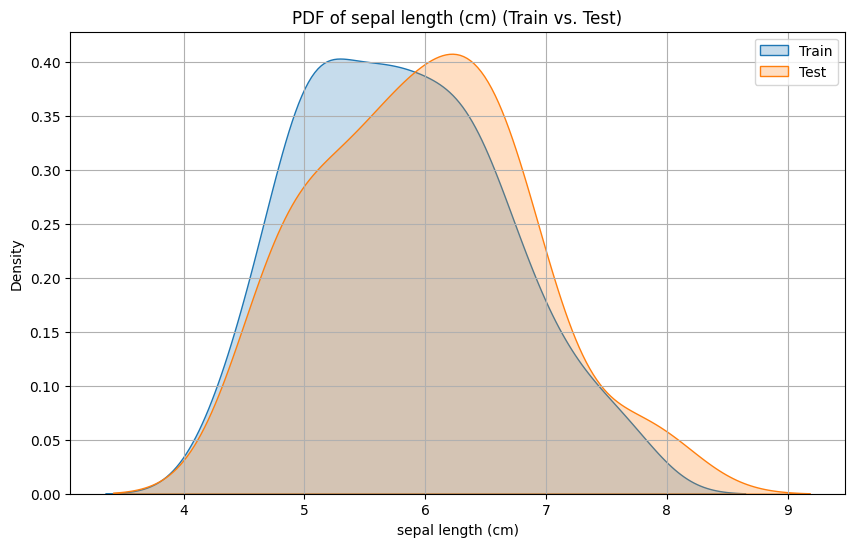

In [8]:
# ب
import matplotlib.pyplot as plt

feature1 = 'sepal length (cm)'
feature2 = 'sepal width (cm)'

plt.figure(figsize=(8, 6))
for target in sorted(df_combined['target'].unique()):
    subset = df_combined[df_combined['target'] == target]
    plt.scatter(subset[feature1], subset[feature2], label=iris.target_names[target])

plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title('Scatter Plot of Sepal Length vs. Sepal Width')
plt.legend()
plt.grid(True)
plt.show()

# *** #

from mpl_toolkits.mplot3d import Axes3D

feature1 = 'sepal length (cm)'
feature2 = 'sepal width (cm)'
feature3 = 'petal length (cm)'

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for target in sorted(df_combined['target'].unique()):
    subset = df_combined[df_combined['target'] == target]
    ax.scatter(subset[feature1], subset[feature2], subset[feature3], label=iris.target_names[target])

ax.set_xlabel(feature1)
ax.set_ylabel(feature2)
ax.set_zlabel(feature3)
ax.set_title('3D Scatter Plot of Iris Features')
ax.legend()
plt.show()

# *** #

import seaborn as sns

correlation_matrix = df_combined[iris.feature_names].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of Iris Features')
plt.show()

# *** #

feature_to_plot = 'sepal length (cm)'

plt.figure(figsize=(10, 6))

sns.kdeplot(df_train[feature_to_plot], label='Train', fill=True)

sns.kdeplot(df_test[feature_to_plot], label='Test', fill=True)

plt.xlabel(feature_to_plot)
plt.ylabel('Density')
plt.title(f'PDF of {feature_to_plot} (Train vs. Test)')
plt.legend()
plt.grid(True)
plt.show()


In [9]:
# ج

feature_to_discretize = 'petal length (cm)'

bins = [0, 2, 5, 8]  # مقادیر برای جدا کردن داده ها
labels = ['Short', 'Medium', 'Long']

df_combined['petal_length_category'] = pd.cut(df_combined[feature_to_discretize], bins=bins, labels=labels, right=False)

print(df_combined[['petal length (cm)', 'petal_length_category']].head())


   petal length (cm) petal_length_category
0                1.0                 Short
1                1.5                 Short
2                4.4                Medium
3                1.6                 Short
4                1.3                 Short


In [10]:
# د
# فیلتر کردن داده‌ها برای گونه Setosa (target=0)
setosa_data = df_combined[df_combined['target'] == 0][iris.feature_names]

setosa_description = setosa_data.describe()
print(setosa_description)


       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count           50.00000         50.000000          50.000000   
mean             5.00600          3.428000           1.462000   
std              0.35249          0.379064           0.173664   
min              4.30000          2.300000           1.000000   
25%              4.80000          3.200000           1.400000   
50%              5.00000          3.400000           1.500000   
75%              5.20000          3.675000           1.575000   
max              5.80000          4.400000           1.900000   

       petal width (cm)  
count         50.000000  
mean           0.246000  
std            0.105386  
min            0.100000  
25%            0.200000  
50%            0.200000  
75%            0.300000  
max            0.600000  
